In [1]:
from dataset_UNSW_NB15 import Dataset_UNSW_NB15
from dataset_UNSW_NB15_1 import Dataset_UNSW_NB15_1
from dataset_NSL_KDD import Dataset_NSL_KDD
from dataset_IoT_Network_Intrusion_Dataset import Dataset_IoT_Network_Intrusion_Dataset
from experiment import Experiment
import matplotlib.pyplot as plt


In [ ]:
dataset = Dataset_UNSW_NB15(10000)
X_train, X_test, y_train, y_test, config = dataset.get_data()
exp = Experiment(X_train, X_test, y_train, y_test, config)
exp.run(k=500, dif=10)

In [ ]:
dataset = Dataset_UNSW_NB15_1(10000)
X_train, X_test, y_train, y_test, config = dataset.get_data()
exp = Experiment(X_train, X_test, y_train, y_test, config)
exp.grid_run(k=500, dif=10)

max_feature: 119
{'n_fi': 1, 'n_pca': 1}
Fit time: 0.5195
Evaluate time: 0.0302
Accuracy: 0.3267
F1: 0.3407
-----------------------------------------------------
{'n_fi': 1, 'n_pca': 3}
Fit time: 0.5036
Evaluate time: 0.0320
Accuracy: 0.0000
F1: 0.0000
-----------------------------------------------------
{'n_fi': 1, 'n_pca': 5}
Fit time: 0.5102
Evaluate time: 0.0312
Accuracy: 0.1860
F1: 0.2376
-----------------------------------------------------
{'n_fi': 1, 'n_pca': 7}
Fit time: 0.5322
Evaluate time: 0.0350
Accuracy: 0.1530
F1: 0.2168
-----------------------------------------------------
{'n_fi': 1, 'n_pca': 9}
Fit time: 0.5124
Evaluate time: 0.0315
Accuracy: 0.3567
F1: 0.4448
-----------------------------------------------------
{'n_fi': 1, 'n_pca': 11}
Fit time: 0.5275
Evaluate time: 0.0345
Accuracy: 0.4053
F1: 0.4654
-----------------------------------------------------
{'n_fi': 1, 'n_pca': 13}
Fit time: 0.5353
Evaluate time: 0.0327
Accuracy: 0.5537
F1: 0.6620
--------------------

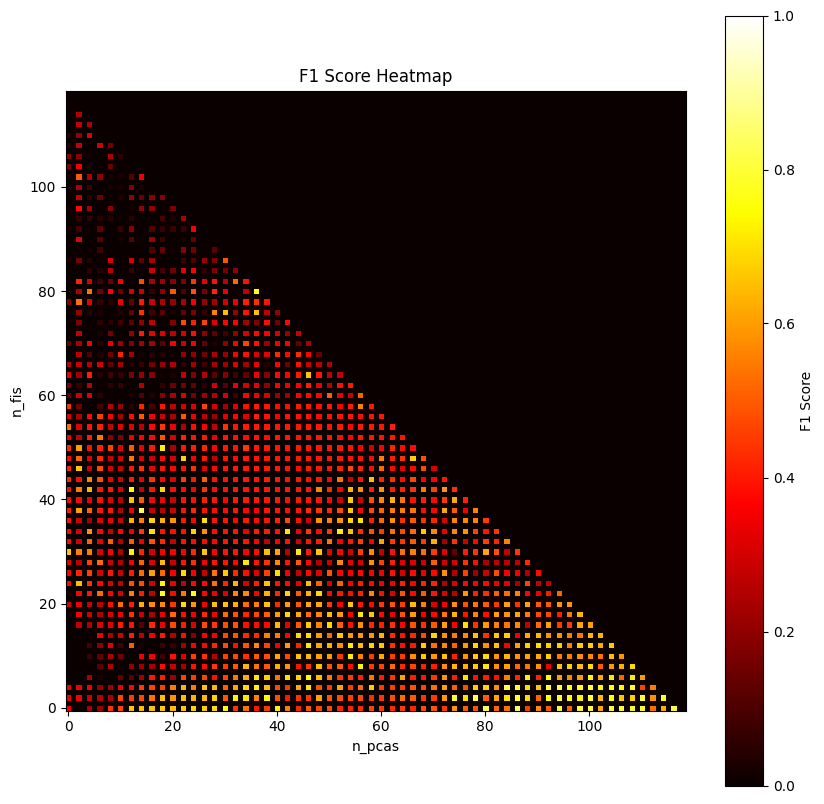

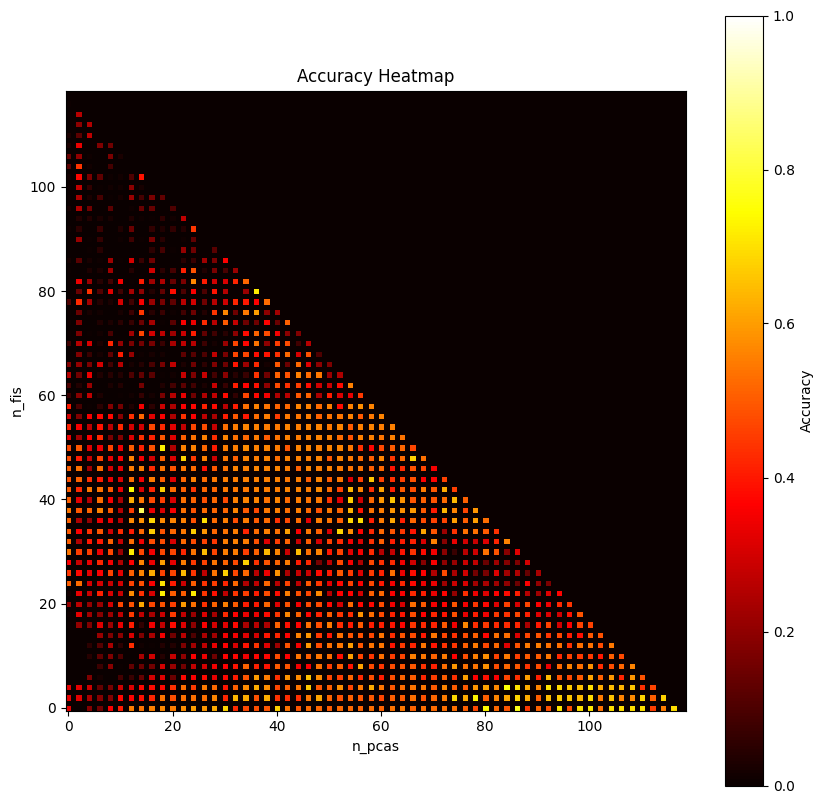

In [2]:
dataset = Dataset_NSL_KDD(10000)
X_train, X_test, y_train, y_test, config = dataset.get_data()
exp = Experiment(X_train, X_test, y_train, y_test, config)
exp.grid_run(k=10000000, dif=2)

In [ ]:
dataset = Dataset_IoT_Network_Intrusion_Dataset()
X_train, X_test, y_train, y_test, config = dataset.get_data()
exp = Experiment(X_train, X_test, y_train, y_test, config)
exp.run(k=500, n_fi=1, n_pca=50)